<h2><u>Statistical Foundations</u></h2>

# Module 2 – Exploratory Data Analysis
<h2> Case Study: EDA On Import/Export HS Data </h2>

In this case study, you will perform exploratory data analysis on export and import data of various countries that use the Harmonised System (HS) for international trades.

##### Data Dictionary 

`HS Code - The code that allows participating countries to classify traded goods on a common basis for customs purposes.`

`Commodity - Name of commodity as per HSCode`

`Country - Country of export/import`

`Year - Year of export/import`

`Value - Value of export/import (in million USD)`

In [5]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [6]:
#Read the data from the uploaded csv files
data_export = pd.read_csv('2018-2010_export.csv')
data_import = pd.read_csv('2018-2010_import.csv')

##### Task 1: Define a function
######   1. For country names which are 'UNSPECIFIED', impute them as NaN.
######   2. Remove rows where 'value' is 0
######   3. Drop NAs
######   4. Change datatype of 'year' as categorical
######   5. Drop duplicates 

In [7]:
def cleanup(data_df):
    data_df['country']= data_df['country'].apply(lambda x : np.NaN if x == "UNSPECIFIED" else x)
    data_df = data_df[data_df.value!=0]
    data_df.dropna(inplace=True)
    data_df.year = pd.Categorical(data_df.year)
    data_df.drop_duplicates(keep="first",inplace=True)
    return data_df

data_export = cleanup(data_export)
data_import = cleanup(data_import)

In [8]:
data_export['cat'] = 'E'
data_import['cat'] = 'I'

df = pd.concat([data_export,data_import],ignore_index=True)

##### Task 2: For the period 2010-2018, you need to find out the top ten export destinations of India i.e which are top ten countries where value of export is highest? For this, you can plot a horizontal barplot.

In [9]:
df_q1 = data_export.groupby('country').agg({'value':'sum'})
df_q1 = df_q1.sort_values(by='value', ascending = False)
df_q1 = df_q1[:10]

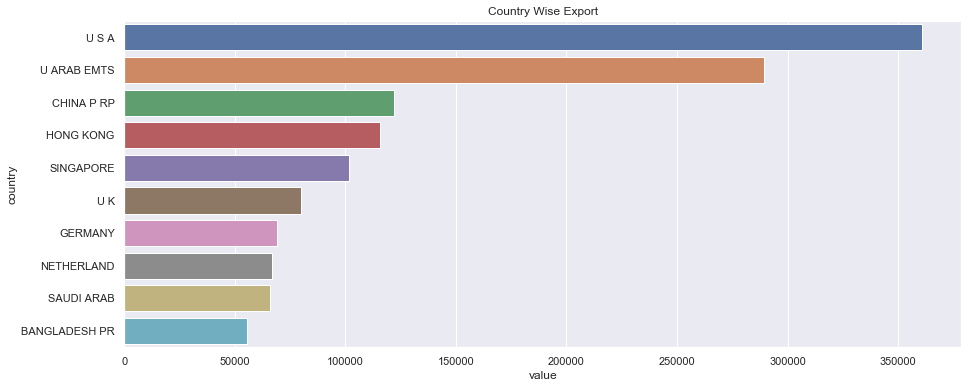

In [10]:
sns.set(rc={'figure.figsize':(15,6)})
sns.barplot(df_q1.value,df_q1.index).set_title('Country Wise Export');

##### Task 3: As an analyst, you need to find out if India has been doing more trade with some nations over others. For this, you need to see if there is any skewness in import/export total volume in year 2018. So, calculate the skewness of import and export values.

In [11]:
from scipy.stats import skew

c1 = df['year'] == 2018
c2 = df['cat'] == 'I'
c3 = df['cat'] == 'E'
s1 = skew(df[c1 & c2].groupby('country')['value'].sum())
s2 = skew(df[c1 & c3].groupby('country')['value'].sum())
print("Import Skewness: {}, \nExport Skewness: {}".format(s1,s2))

Import Skewness: 5.776065084088768, 
Export Skewness: 7.6298400417428285


##### Task 4: Trade deficit is the amount by which the cost of a country's imports exceeds the value of its exports. Plot a line chart and compare the trend of total import and export values for each year  from India. This will give a fair idea about trade deficit.

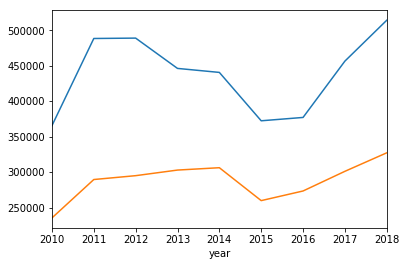

In [28]:
df[df['cat'] == 'I'].groupby(['year'])['value'].sum().plot();
df[df['cat'] == 'E'].groupby(['year'])['value'].sum().plot();

##### Task 5: Export value of 'ZINC AND ARTICLES THEREOF', has been maximum to UK in any year.  Plot bar chart for max export values of each year to UK

In [33]:
df[(df['country'] == 'U K') & (df['cat'] == 'E')].groupby(['year']).max()[['value', 'Commodity']]

,value,Commodity
year,,
2010,844.55,ZINC AND ARTICLES THEREOF.
2011,913.12,ZINC AND ARTICLES THEREOF.
2012,811.08,ZINC AND ARTICLES THEREOF.
2013,1101.94,ZINC AND ARTICLES THEREOF.
2014,955.88,ZINC AND ARTICLES THEREOF.
2015,905.79,ZINC AND ARTICLES THEREOF.
2016,827.34,ZINC AND ARTICLES THEREOF.
2017,1018.49,ZINC AND ARTICLES THEREOF.
2018,1063.26,ZINC AND ARTICLES THEREOF.


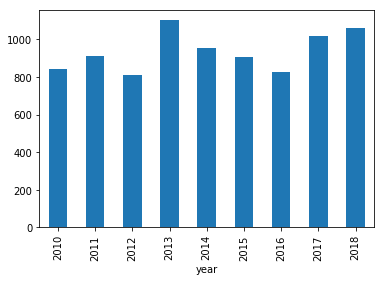

In [30]:
df[(df['country'] == 'U K') & (df['cat'] == 'E')].groupby(['year']).max()['value'].plot(x='Year', y='Maximum value',kind="bar");

##### Task 6: If value exceeds 1500, it can termed as expensive export/import. For expensive values, compare the means of import/export values for each commodity i.e. boxplot for export vs import for each HS Code.

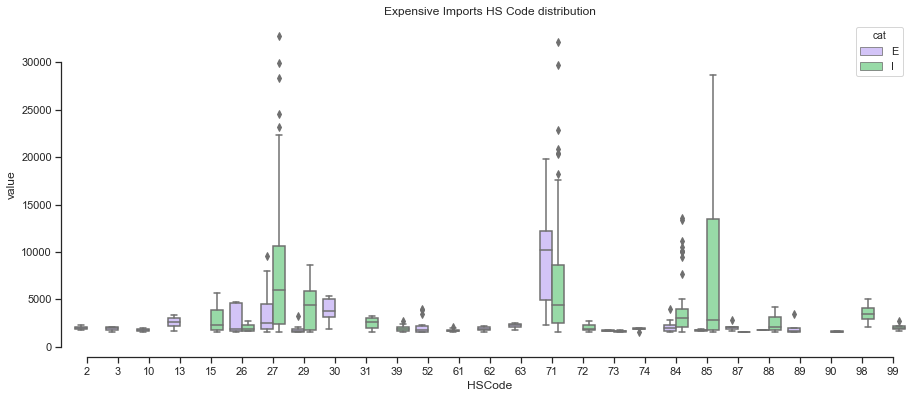

In [129]:
thresh = 1500
df_1 = df[(df.value > thresh)]
sns.set(style="ticks", palette="pastel")
sns.boxplot(x="HSCode", y="value", palette=["m", "g"], hue =  'cat',data=df_1).set_title('Expensive Imports HS Code distribution');
sns.despine(offset=10, trim=True)

##### Task 7: In order to analyse the values of imports made by Australia during 2010 - 2018, plot the total values of imports each year. Ensure the pie holding the maximum value is exploded. 

In [130]:
x = pd.DataFrame(df[(df.country == 'AUSTRALIA') & (df.cat == 'I')].groupby(['year']).sum()['value']).reset_index()

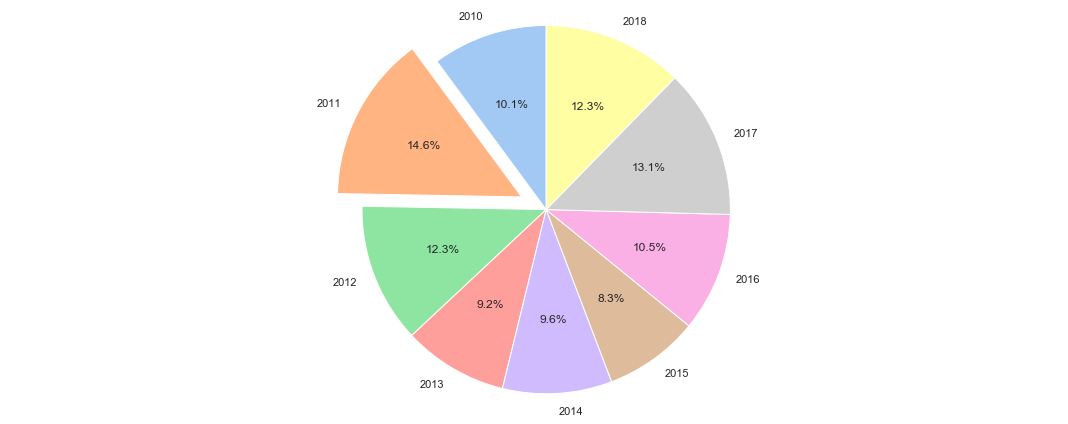

In [131]:
plt.pie(x['value'],labels=x['year'],shadow=False,explode=(0,0.15,0,0,0,0,0,0,0),startangle=90,autopct='%1.1f%%');

plt.axis('equal')
plt.tight_layout()
plt.show()